In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/KDT_ProjectManagement

/content/drive/MyDrive/Colab Notebooks/KDT_ProjectManagement


In [8]:
# 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
#import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [9]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [10]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# KoNLPy Okt 임포트
from konlpy.tag import Okt

In [12]:
df_train = pd.read_csv("../data/관광데이터/train.csv")
df_test = pd.read_csv("../data/관광데이터/test.csv")

In [13]:
df_train.head()

,id,img_path,overview,cat1,cat2,cat3
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


In [14]:
df_train = df_train.drop(['id','img_path'], axis=1)
df_train.head()

,overview,cat1,cat2,cat3
0,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16986 entries, 0 to 16985
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  16986 non-null  object
 1   cat1      16986 non-null  object
 2   cat2      16986 non-null  object
 3   cat3      16986 non-null  object
dtypes: object(4)
memory usage: 530.9+ KB


In [16]:
df_train['cat1'].value_counts()

인문(문화/예술/역사)    5614
음식              4912
레포츠             2611
자연              1719
숙박              1434
쇼핑               696
Name: cat1, dtype: int64

In [17]:
df_train['cat2'].value_counts()

음식점       4912
육상 레포츠    2288
자연관광지     1578
역사관광지     1571
숙박시설      1434
문화시설      1220
휴양관광지      889
체험관광지      805
쇼핑         696
축제         569
건축/조형물     328
수상 레포츠     277
관광자원       141
공연/행사      139
산업관광지       93
복합 레포츠      24
항공 레포츠      11
레포츠소개       11
Name: cat2, dtype: int64

In [18]:
df_train['cat3'].value_counts()

한식                3438
야영장,오토캠핑장         1558
바/까페               785
유적지/사적지            622
일반축제               549
                  ... 
MTB                  2
대중콘서트                2
인라인(실내 인라인 포함)       2
스카이다이빙               2
클래식음악회               2
Name: cat3, Length: 128, dtype: int64

In [19]:
df_train['cat3'].unique()

array(['항구/포구', '골프', '한식', '야영장,오토캠핑장', '섬', '일반축제', '유적지/사적지', '일식',
       '자연휴양림', '전시관', '관광단지', '모텔', '스키(보드) 렌탈샵', '바/까페', '채식전문점',
       '한옥스테이', '컨벤션', '성', '중식', '안보관광', '전문상가', '이색거리', '해수욕장', '5일장',
       '미술관/화랑', '공원', '상설시장', '박물관', '도서관', '공연장', '농.산.어촌 체험', '복합 레포츠',
       '펜션', '산', '기념탑/기념비/전망대', '기념관', '자동차경주', '자전거하이킹', '희귀동.식물',
       '유명건물', '수목원', '유원지', '사찰', '강', '자연생태관광지', '박람회', '문화전수시설', '계곡',
       '폭포', '서양식', '종교성지', '동상', '기타행사', '고택', '국립공원', '게스트하우스', '썰매장',
       '요트', '문화원', '래프팅', '승마', '공예,공방', '트래킹', '온천/욕장/스파', '수련시설',
       '해안절경', '패밀리레스토랑', '기암괴석', '기타', '홈스테이', '민물낚시', '콘도미니엄', '민박',
       '테마공원', '유람선/잠수함관광', '바다낚시', '수영', '백화점', '호수', '카약/카누', '외국문화원',
       '면세점', '다리/대교', '카지노', '분수', '동굴', '도립공원', '윈드서핑/제트스키', '특산물판매점',
       '유스호스텔', '고궁', '서비스드레지던스', '민속마을', '전통공연', '문', '식음료', '번지점프',
       '터널', '문화관광축제', '카트', '클럽', '발전소', '대중콘서트', 'MTB', '군립공원', '스케이트',
       '대형서점', '생가', '스카이다이빙', '영화관', '헹글라이딩/패러글라이딩', '스노쿨링/스킨스쿠버다이

In [20]:
# 중복 데이터 체크 및 삭제
df_train.duplicated().sum(), df_test.duplicated().sum()

(12, 0)

In [21]:
# 결측치 확인
df_train.isnull().sum()

overview    0
cat1        0
cat2        0
cat3        0
dtype: int64

In [55]:
# data, target 나누기
data = df_train["overview"]
target = df_train["cat3"]
#target = df_train['cat1']
print(data.shape, target.shape)

(16986,) (16986,)


In [23]:
# train, test ,validation 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42,stratify=target,test_size= 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42,stratify=y_train,test_size= 0.2)

print(f'x_train.shape:{x_train.shape}, y_train.shape:{y_train.shape} ') 
print(f'x_test.shape:{x_test.shape}, y_test.shape:{y_test.shape}')
print(f'x_val.shape:{x_val.shape}, y_val.shape:{y_val.shape}')

x_train.shape:(10870,), y_train.shape:(10870,) 
x_test.shape:(3398,), y_test.shape:(3398,)
x_val.shape:(2718,), y_val.shape:(2718,)


In [25]:
#x_train[0],y_train[:10]

In [56]:
# target 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

print(y_train)


[3 1 4 ... 0 4 3]


## [2] 텍스트 분류
---
- 토큰화
- 불용어 처리
- 정규식(영어로만 이루어진 단어)
- 소문자 변환
- 표제어 추출
- 문장 형태로 복원

In [27]:
okt = Okt()

In [28]:
# 텍스트 전처리 함수 
stop_words =['이','있','하','것','들','그','되','수','이','보','않','없','나','사람','주','아니','등','같','우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두','말하','알','그러나','받','못하','일','그런','또','문제','더','사회','많','그리고','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','자신','안','어떤','내','내','경우','명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','여자','개','전','들','사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓']

def preprocessingText(sentence):
    words = []
    
    # 토큰화
    wordlist = okt.morphs(sentence) 
    for word in wordlist: 
        
        # 불용어 처리
        if word not in stop_words: 
            # 알파벳조합을 제외한 모든 문자 제거
            new_word = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '',word)
            
            words.append(new_word)
            #words.append(word)
            
    # 단어 -> 문장으로 복원
    return " ".join(words)

# data = [preprocessingText(i) for i in data]

In [29]:
x_train = [preprocessingText(i) for i in x_train]
x_test = [preprocessingText(i) for i in x_test]
x_val = [preprocessingText(i) for i in x_val]

In [30]:
x_train[0:10],x_test[0],x_val[0]

(['주덕 진 예술 회관 은 전주시 에서 시민 의 문화 예술 활동 을 지원 하기 위 하여 만든 곳 이다   ',
  '백 제 회관 은 전남 구례군 산동면 관산리 에 있다  대표 메뉴 는 산채 한정식 이다  밖에 산채 백반  재첩국  다슬기 국  된장찌개  추어탕 을 판다  음식 을 주문 하면  에 가까운 맛깔 스러운 반찬 함께 나온다  음식점 은 지리산 온 천 랜드 와 가까운 거리 에 있어 연 계 관광 에 나서기 수월하다 ',
  '고래 뿌리 선착장 은 경기도 안산시 대부도 의 서 남쪽 끝단 에 있는 선착장 이다  뾰족 해변 모양 고래 의 입 을 닮았다고 해서 고 랫 부리 라는 이름 붙여졌다고 한다  썰물 등대 까지 가는 길이 드러나 걸어가거나 차량 으로 이동 할 있고  바다로 이어진 선착장 길 을 따라 산책 할 있다  개인 으로 낚시 를 할 수도 있으며 가을 철 망둥어 낚시 로 유명하다 ',
  '인천광역시 강화군 내가면 외포리 에 있는 조선시대 의 돈대 이다  망양 돈대 는 높이    폭    둘레   의 원형 으로 대포 를 올 리기 위 포좌     개소 와 치첩  소가 있고 윗 부분 에는 벽돌 로 만든 성가 퀴  몸 을 숨기 고 을 공격 하기 위해 성 위 에 덧 쌓은 낮은 담 으로 여장 또는 성 첩 이라고 함  의 흔적 남아 있다  주위 에는 남쪽 으로   떨어진 곳 에 건평 돈대  인천광역시 기념물  있고 서쪽 으로   떨어진 곳 에 삼 암 돈대  인천광역시 유형문화재  있다  밖에 당시 망양 돈대 와 함께 축 조 된 돈대 로는 택지  분 오리 돈대  이상 인천광역시 유형문화재  장곶  계룡  건평  건평  굴암  미루지  북 곶 돈대  이상 인천광역시 기념물  망월  선수  화도  무태 등대  이상 인천광역시 문화재 자료  있다  특히 해안 에 위치 화도면 에 집중 으로 분포 되어 있다   ',
  '가연 은    프로그램 생생 정보 방송 에 출연 바 있는 음식점 이다  대표 메뉴 는 단양 에서 재배 특산 물 마늘 을 넣은 마늘 떡갈비 다  밖에 한우

In [31]:
# 텍스트 수치화
def transformText(data, num_words):
  tokenizer = Tokenizer(num_words= num_words) # num_words 
  tokenizer.fit_on_texts(data)
  seq_data = tokenizer.texts_to_sequences(data)
  
  # 사전 단어 총개수
  voca_word_num = len(tokenizer.word_index)
  return(seq_data,voca_word_num)

In [32]:
seq_x_train,voca_word_num_x_train = transformText(x_train,100000)
seq_x_test,voca_word_num_x_test = transformText(x_test,100000)
seq_x_val,voca_word_num_x_val = transformText(x_val,100000)
print(f'단어사전 단어 개수: {voca_word_num_x_train}')

단어사전 단어 개수: 51277


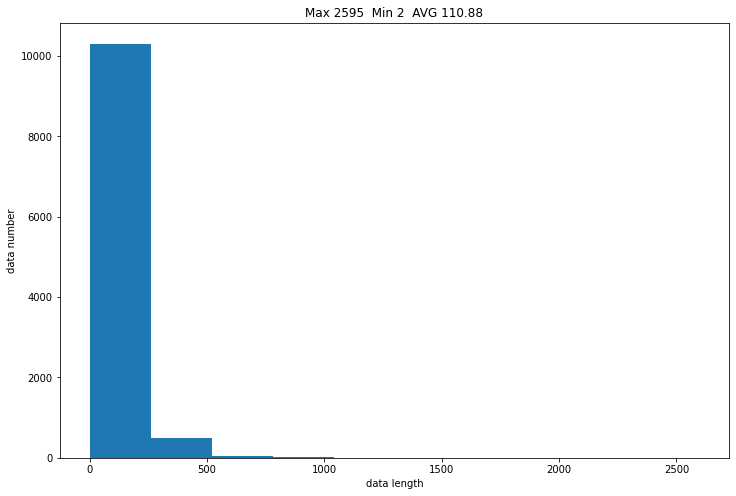

In [33]:
# 단어 갯수 파악 함수
def checkLength(datas):

  # 기사 개당 단어 개수
  length=[len(data) for data in datas]
  
  # 히스토그램
  plt.figure(figsize=(12,8))
  plt.hist(length)
  plt.title(f'Max {max(length)}  Min {min(length)}  AVG {round(sum(length)/len(length),2)}')
  plt.xlabel('data length')
  plt.ylabel('data number')
  plt.show()
# return length
  
checkLength(seq_x_train)    

In [34]:
# 패딩 설정:100
pad_length = 100
pad_x_train = pad_sequences(seq_x_train, maxlen= pad_length)
pad_x_test = pad_sequences(seq_x_test, maxlen= pad_length)
pad_x_val = pad_sequences(seq_x_val, maxlen= pad_length)

# 모델구축
---

In [35]:
from tensorflow.keras.layers import SimpleRNN, GRU,Embedding, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [36]:
EMB_DIM = 32                     # 임베딩 벡터 크기 
WORD_NUM = voca_word_num_x_train # 단어사전 수
HIDDEN_NODE = 1000                 # 은닉층 뉴런 수
INPUT_LENGH = pad_length         # 1문장의 토큰 수

In [37]:
print(INPUT_LENGH,voca_word_num_x_train )

100 51277


In [39]:
model = Sequential() #EMB_DIM
model.add(Embedding(WORD_NUM,EMB_DIM, input_length=INPUT_LENGH))
model.add(GRU(HIDDEN_NODE,return_sequences=True))
model.add(Dropout(0.7))
model.add(GRU(HIDDEN_NODE,return_sequences=True))
model.add(Dropout(0.7))
model.add(GRU(HIDDEN_NODE))
model.add(Dropout(0.7))

model.add(Dense(128, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           1640864   
                                                                 
 gru_3 (GRU)                 (None, 100, 1000)         3102000   
                                                                 
 dropout_2 (Dropout)         (None, 100, 1000)         0         
                                                                 
 gru_4 (GRU)                 (None, 100, 1000)         6006000   
                                                                 
 dropout_3 (Dropout)         (None, 100, 1000)         0         
                                                                 
 gru_5 (GRU)                 (None, 1000)              6006000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)             

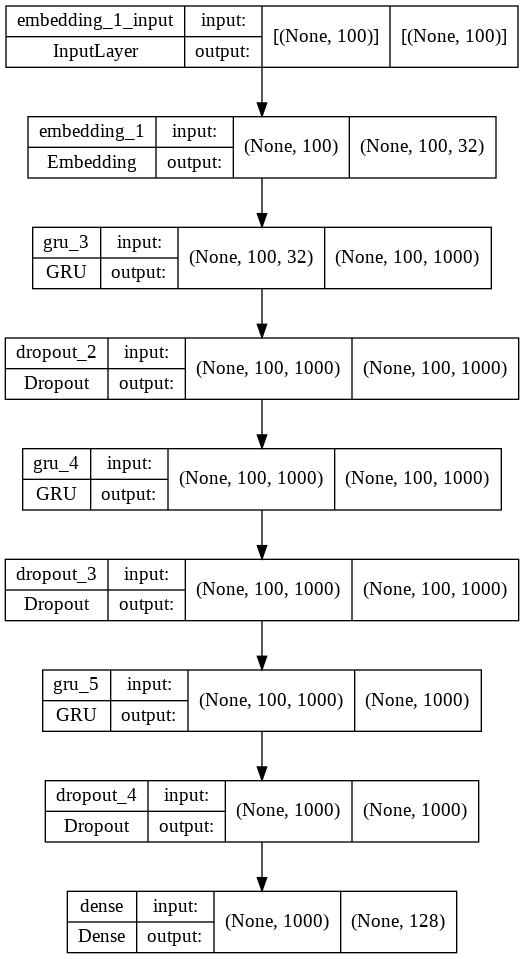

In [40]:
plot_model(model, show_shapes=True)

In [41]:
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate =0.1)

# 하이퍼 파라미터 설정
---

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

# patience
patience_earlystop = 5
patience_ReduceLROnPlateau = 2

# EarlyStop
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=patience_earlystop,
                          verbose=1)

# Learning Rate 조절 (변화량 0.5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=patience_ReduceLROnPlateau, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-5)

In [43]:
epochs=30
batch_size=64

history = model.fit(pad_x_train,
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(pad_x_val,y_val),
                    callbacks=[earlystop, learning_rate_reduction])

Epoch 1/30
170/170 [==============================] - 32s 145ms/step - loss: 1.4045 - acc: 0.4894 - val_loss: 2.0766 - val_acc: 0.3028 - lr: 0.0010
Epoch 2/30
170/170 [==============================] - 24s 140ms/step - loss: 0.7742 - acc: 0.7128 - val_loss: 2.3390 - val_acc: 0.2910 - lr: 0.0010
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 0.4025 - acc: 0.8494
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
170/170 [==============================] - 23s 138ms/step - loss: 0.4025 - acc: 0.8494 - val_loss: 3.4638 - val_acc: 0.2907 - lr: 0.0010
Epoch 4/30
170/170 [==============================] - 23s 138ms/step - loss: 0.1431 - acc: 0.9517 - val_loss: 3.9041 - val_acc: 0.2517 - lr: 5.0000e-04
Epoch 5/30
170/170 [==============================] - ETA: 0s - loss: 0.0561 - acc: 0.9827
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
170/170 [==============================] - 23s 138ms/step - loss: 0.0561 - acc: 0

In [45]:
# 학습 히스토리 시각화

# train ,val 비교 함수 (loss, accuracy)
def plot_smoothed_learning_curves(history):
    val_loss = history.history['val_loss']#[-30:-1] #Uncomment if you want to see only the last epochs
    loss = history.history['loss']#[-30:-1]
    acc = history.history['acc']#[-30:-1]
    val_acc = history.history['val_acc']#[-30:-1]
    
    epochs = range(1, len(acc)+1 )
    
    # loss, acc Plot 
    fig, ax = plt.subplots(2,1, figsize=(12, 12))
    ax[0].plot(epochs, smooth_curve(loss), 'ro', label="Smoothed training loss")
    ax[0].plot(epochs, smooth_curve(val_loss), 'b', label="Smoothed validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')

    ax[1].plot(epochs, smooth_curve(acc), 'ro', label="Smoothed training accuracy")
    ax[1].plot(epochs, smooth_curve(val_acc), 'b',label="Smoothed validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    return

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

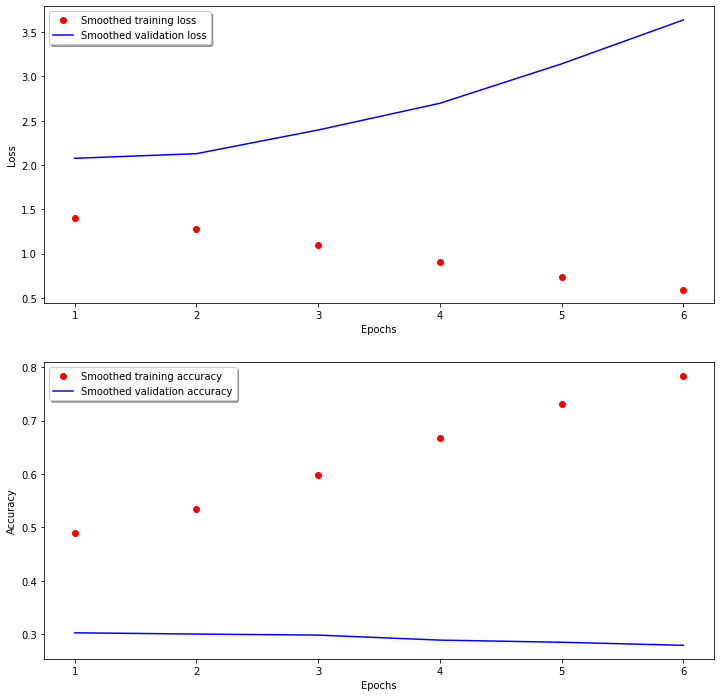

In [46]:
plot_smoothed_learning_curves(history)

In [47]:
pred =model.predict(pad_x_test)
pred = np.argmax(pred, axis=1)
print(pred[0:30])
print(y_test[0:30])
count = 0
for i in pred:
    if pred[i] != y_test[i]:
        count += 1
print('total-predict:',len(y_test),'\nCorrect-predict:',len(y_test)-count,'\nWrong-predict:',count)

[3 4 4 0 4 4 4 5 3 4 2 4 2 2 5 5 4 4 4 5 2 3 2 4 2 5 4 4 2 0]
[4 4 4 4 0 3 0 0 3 2 4 4 2 3 0 5 2 5 3 0 3 3 3 2 3 4 2 0 3 5]
total-predict: 3398 
Correct-predict: 794 
Wrong-predict: 2604


accuracy score: 0.2698646262507357


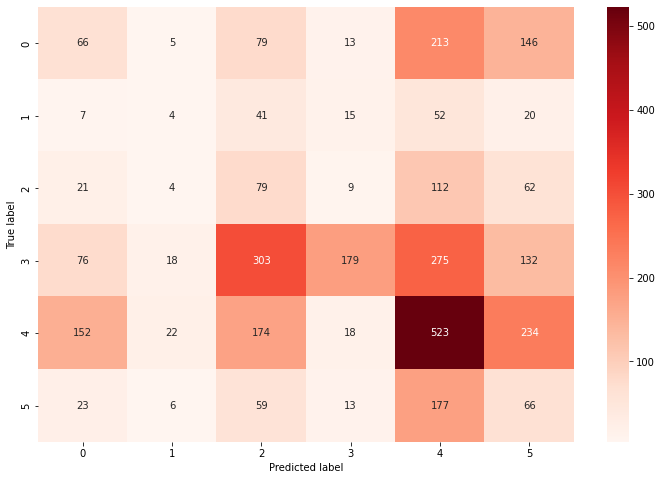

In [49]:
def plot_confusion_matrix(model_name):
    # Predict 
    y_pred = model_name.predict(pad_x_test)

    # Y_pred는 각 확률값을 나타내므로 max 확률로 선택 
    y_pred = np.argmax(y_pred,axis = 1)
    
    #accuracy scores
    print('accuracy score:', accuracy_score(y_test,y_pred))
    
    # confusion matrix 설정
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, index = range(6), columns = range(6))

    # confusion matrix 시각화
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

plot_confusion_matrix(model)

### PassiveAggressiveClassifier
---

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [59]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_pac = tfidf.fit_transform(x_train)
x_test_pac = tfidf.transform(x_test)

Accuracy: 72.31%


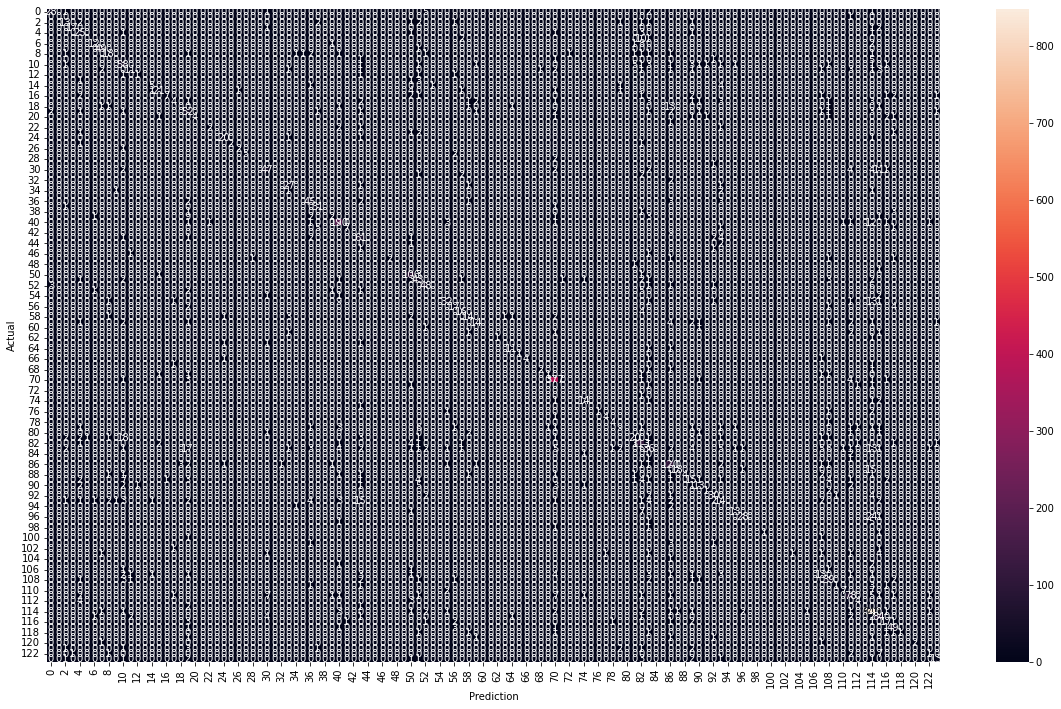

In [61]:
# pac 

# PAC 모델 구축
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(x_train_pac, y_train.values.ravel())

# 예측 점수
y_pred_pac= pac.predict(x_test_pac)
score_pac = accuracy_score(y_test, y_pred_pac)
print(f'Accuracy: {round(score_pac*100, 2)}%')

# 혼동행렬
plt.figure(figsize=(24,16))
ax = sns.heatmap(confusion_matrix(y_test,y_pred_pac), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()